In [38]:
import os
import sys

import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

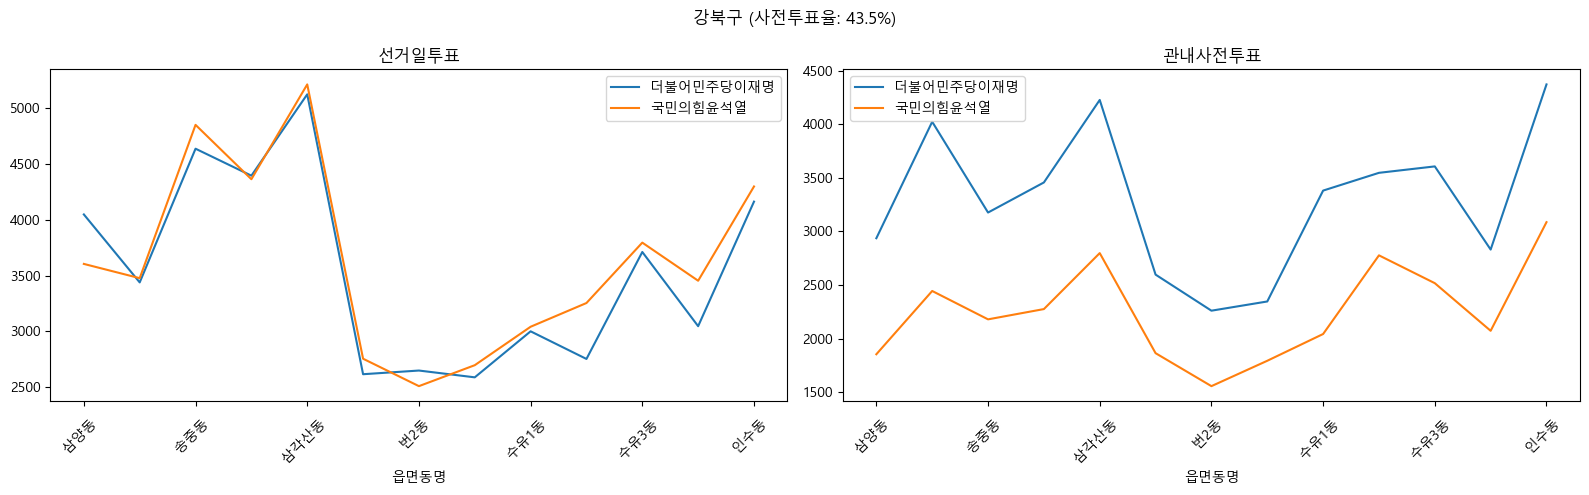

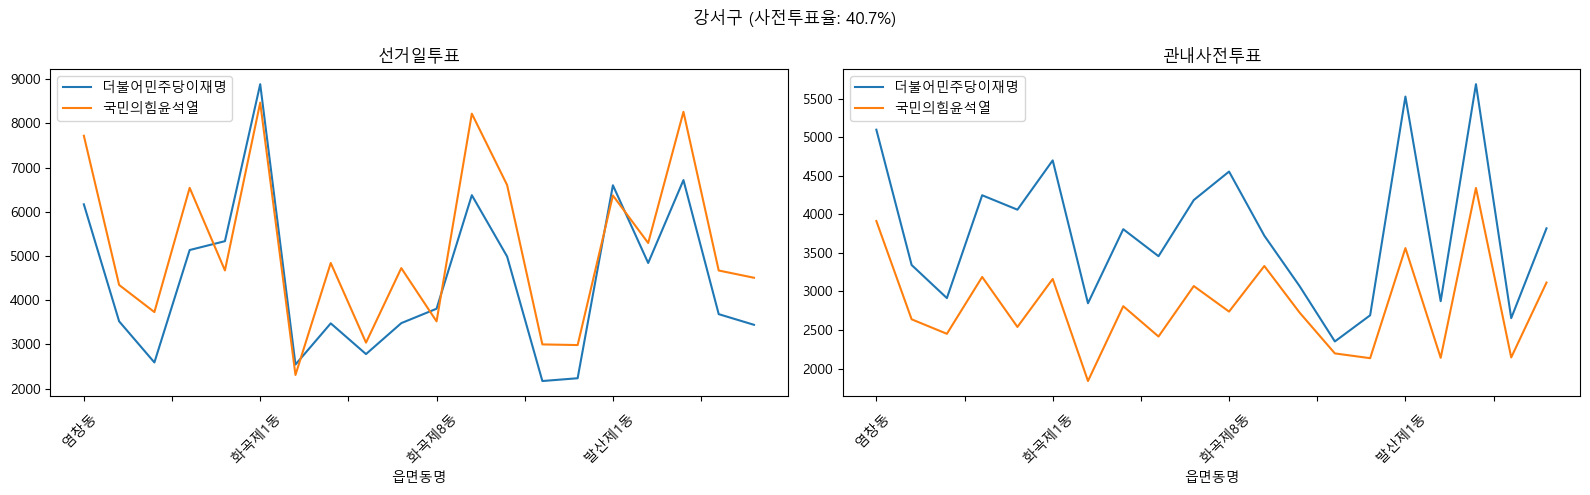

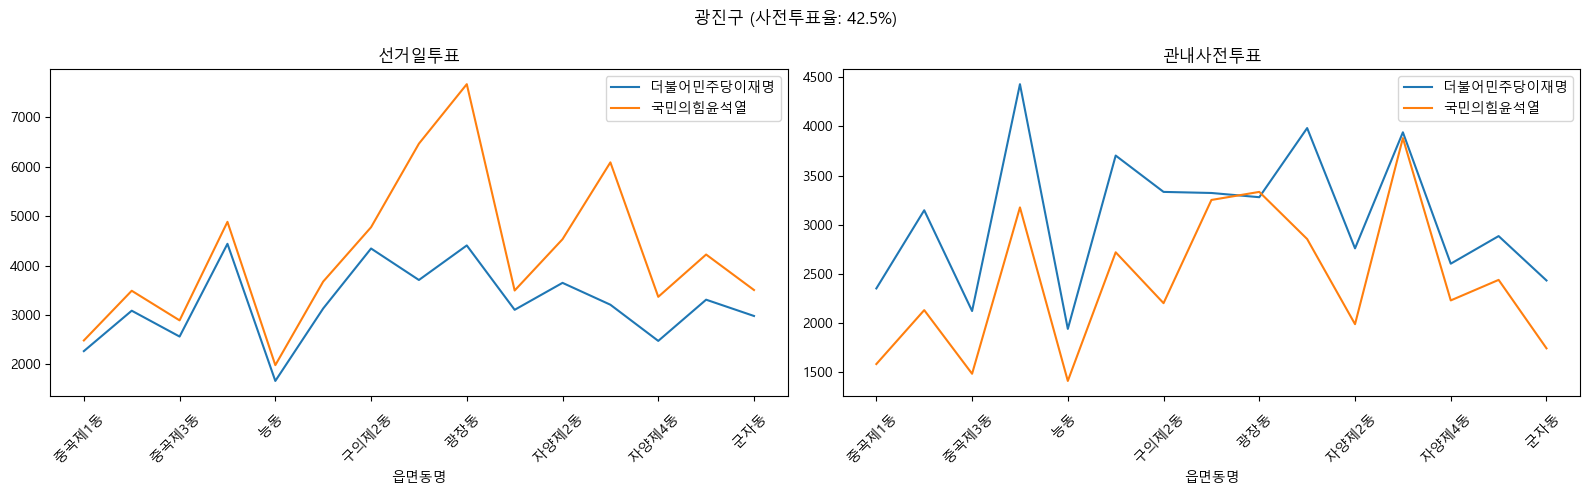

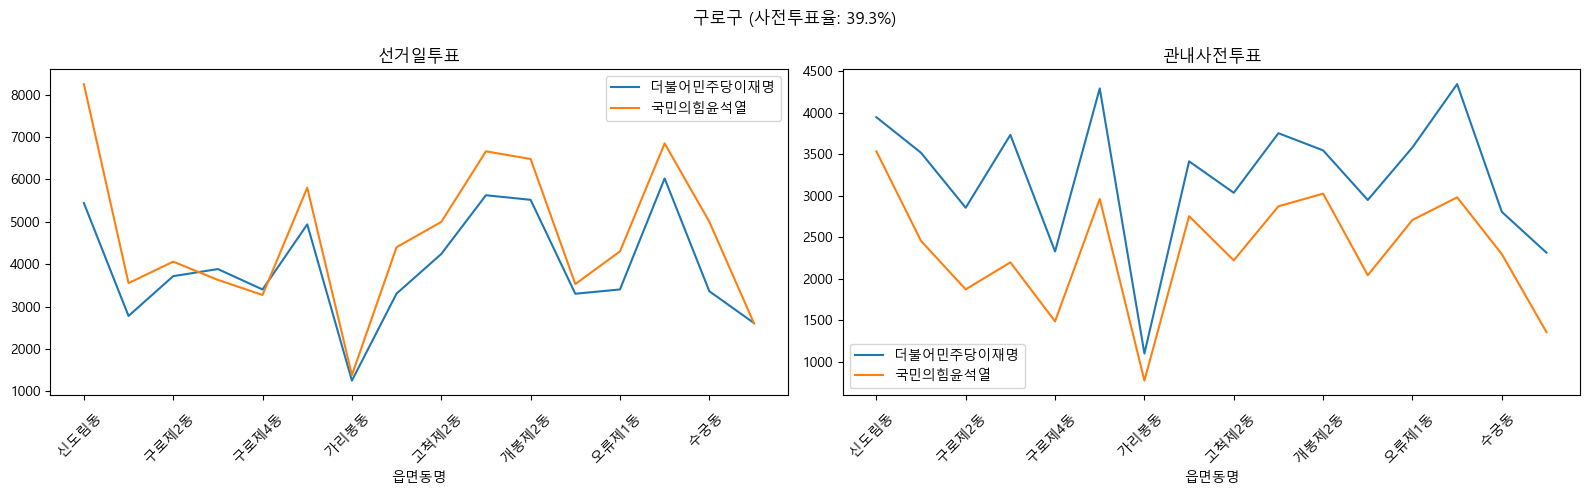

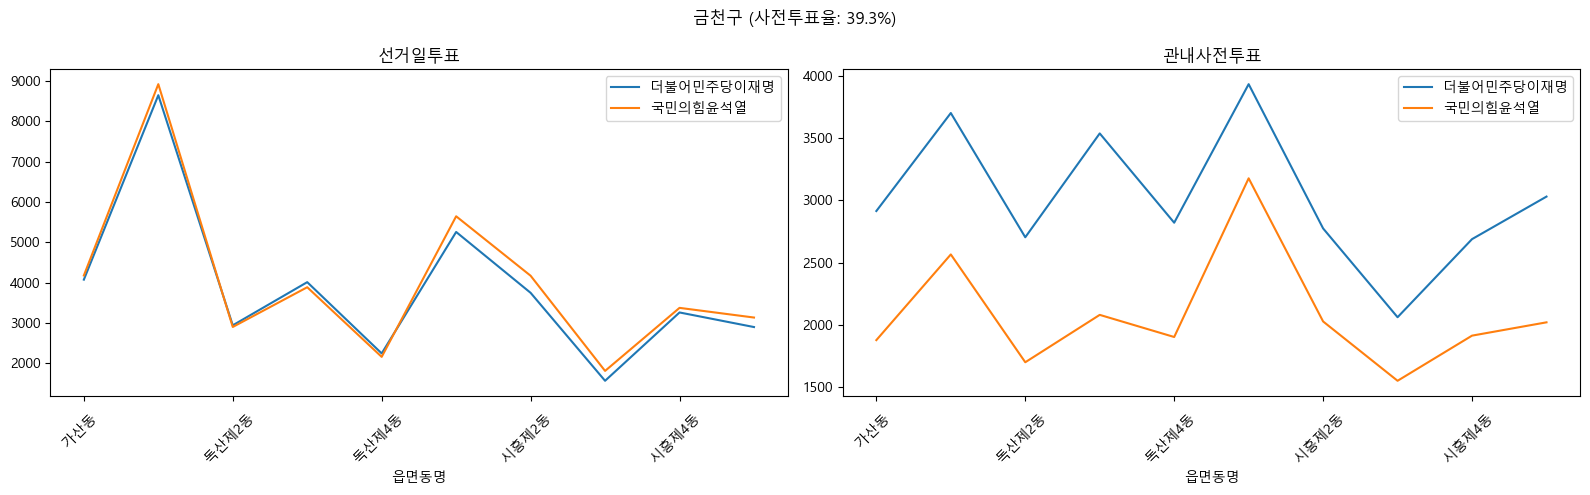

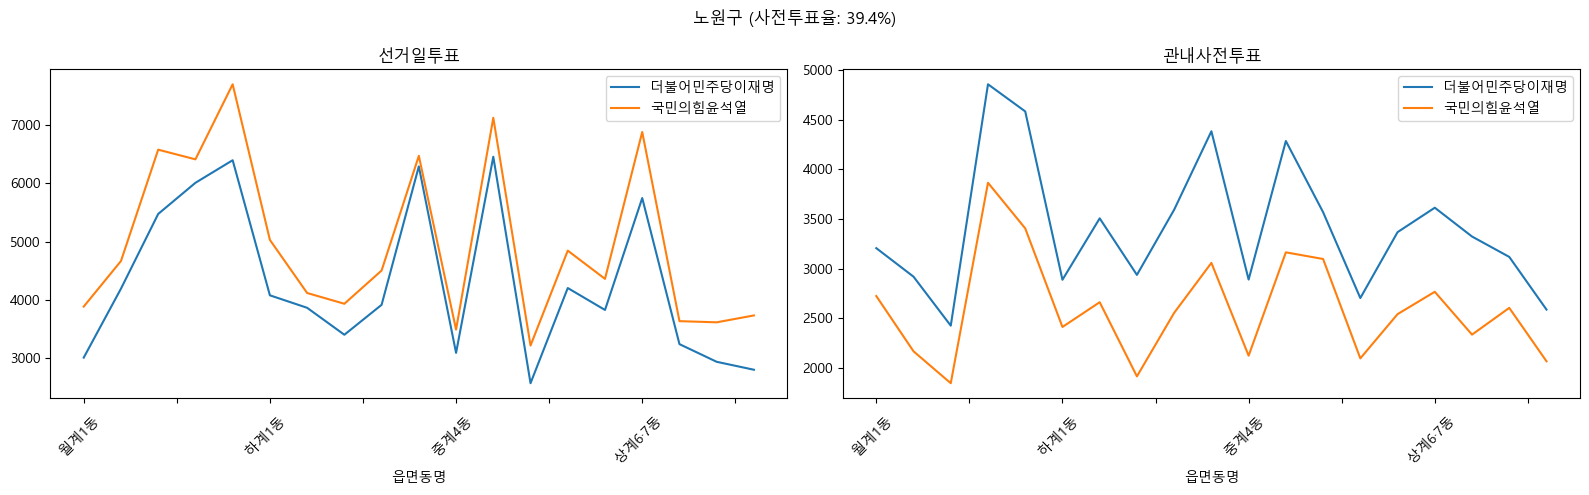

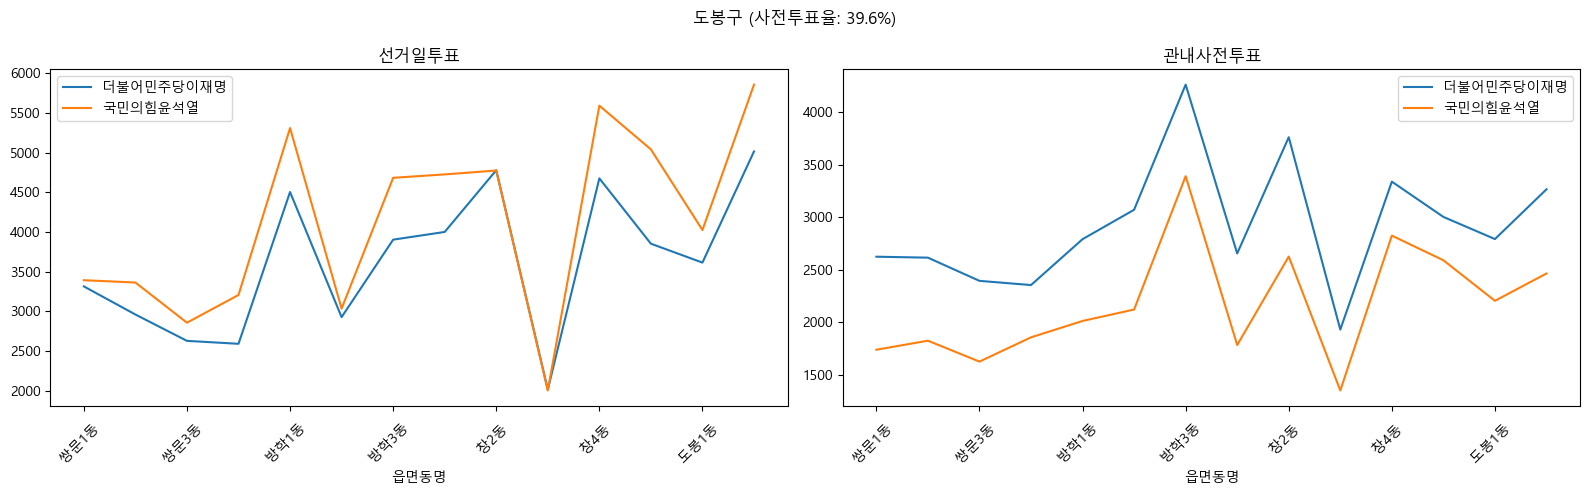

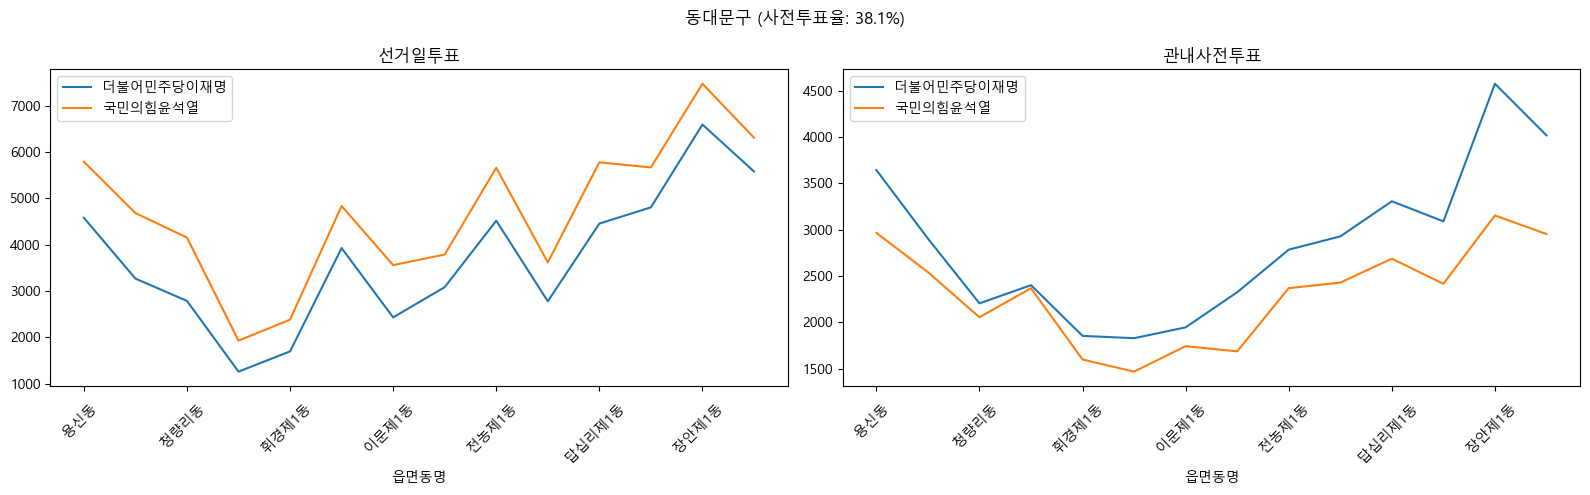

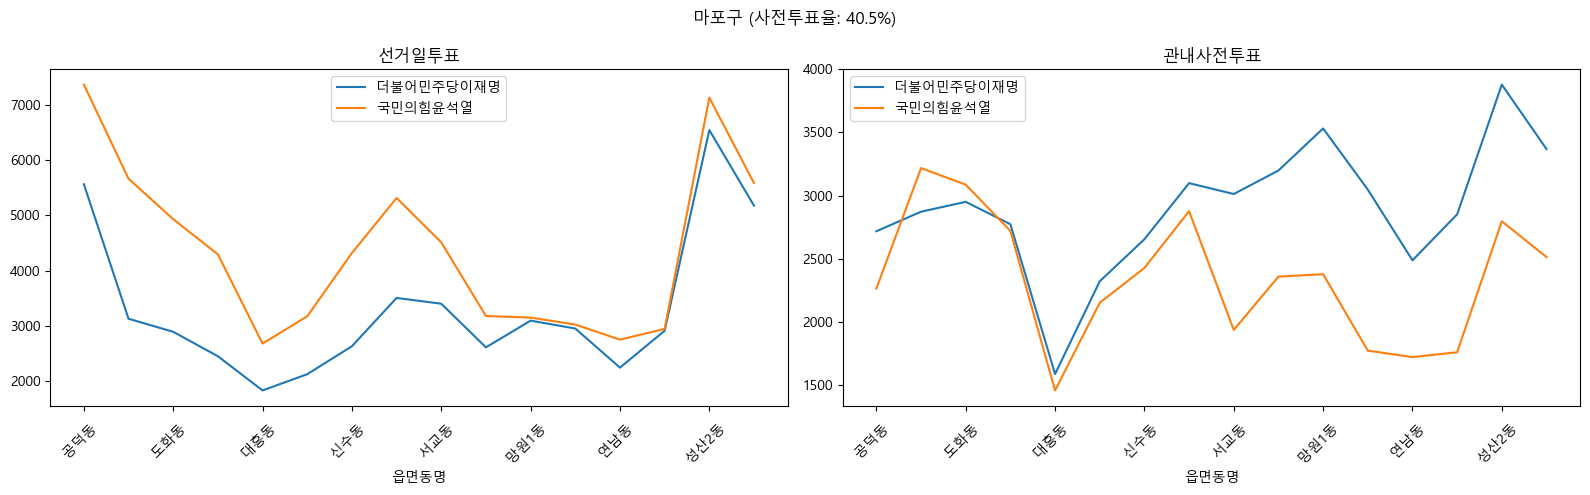

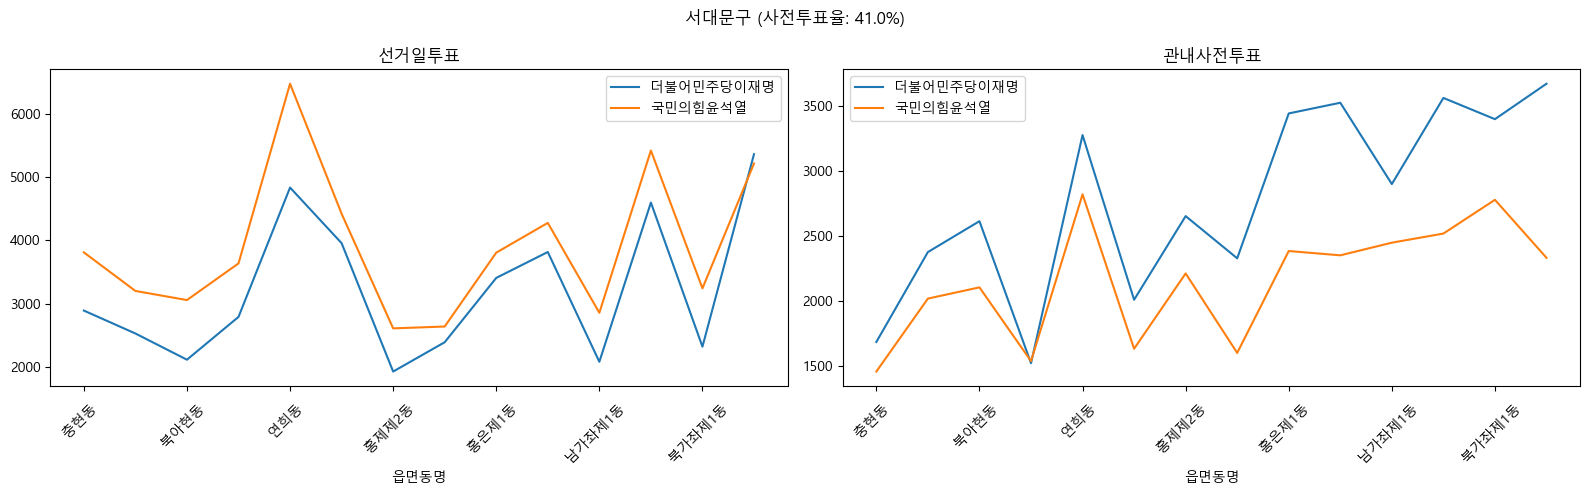

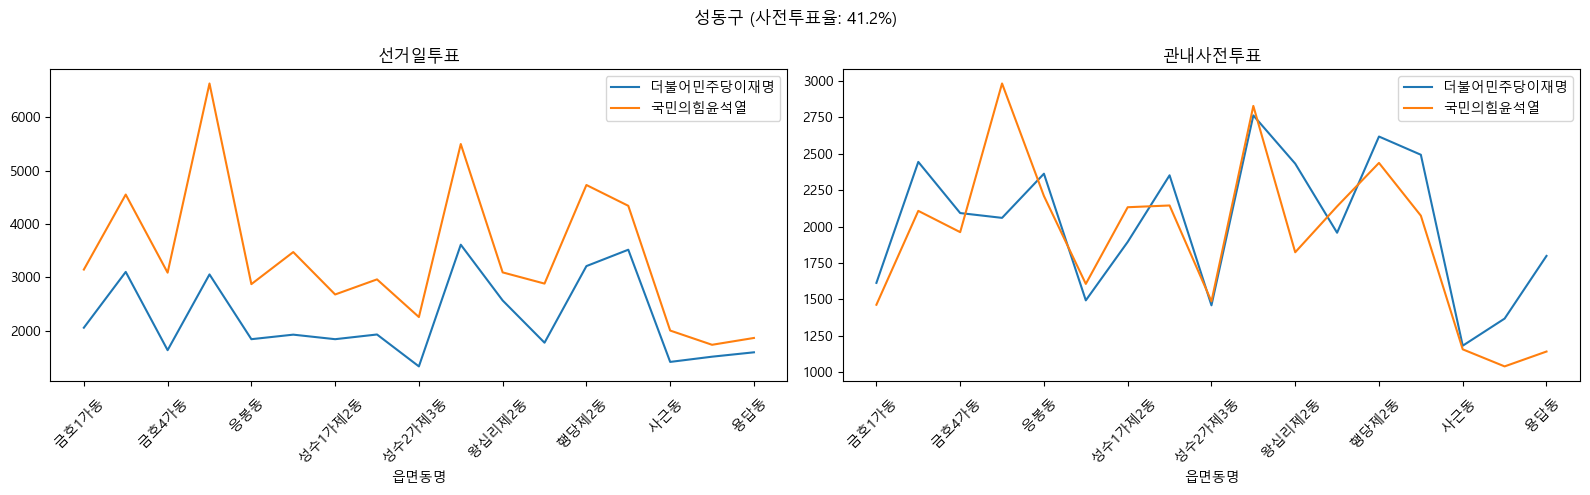

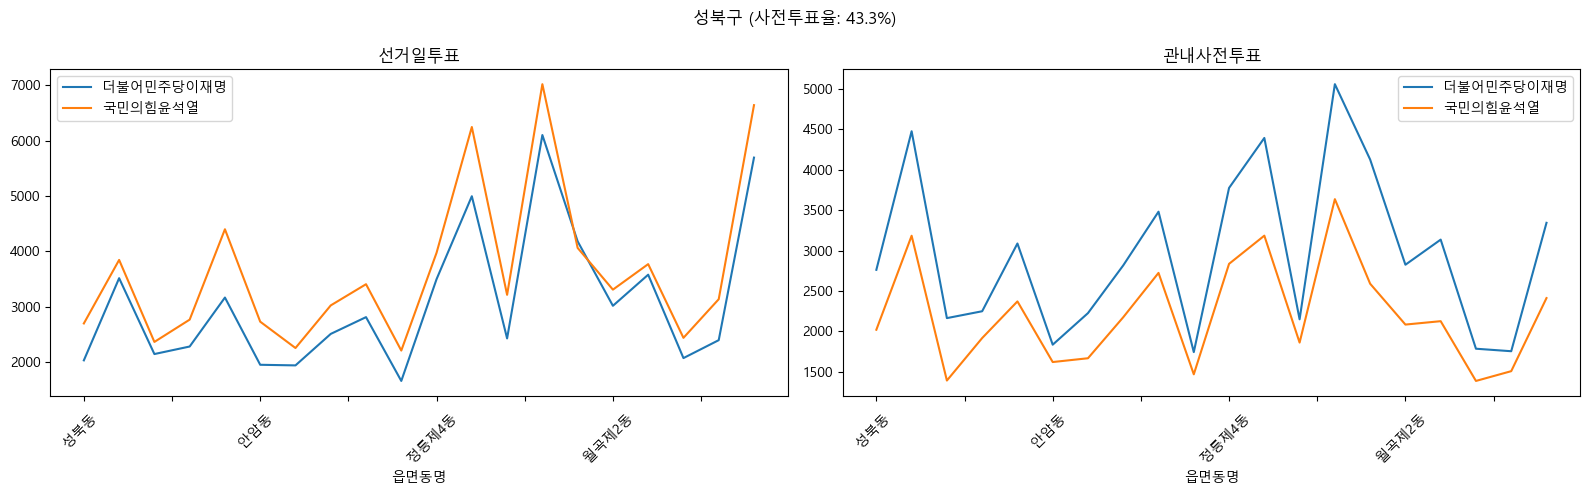

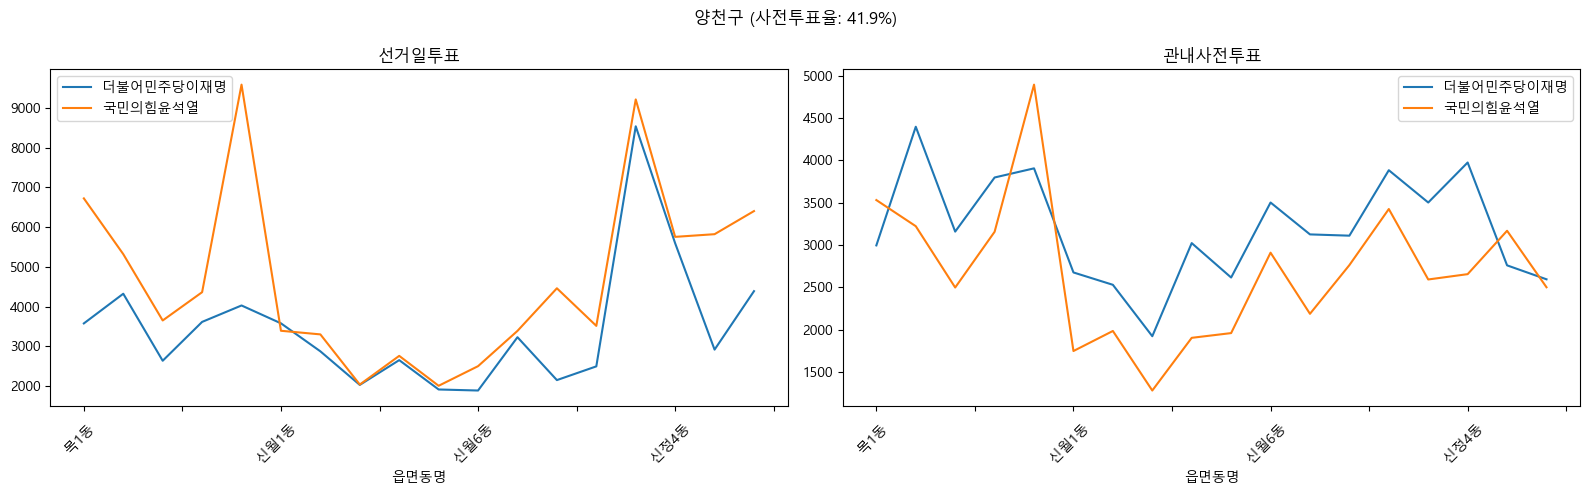

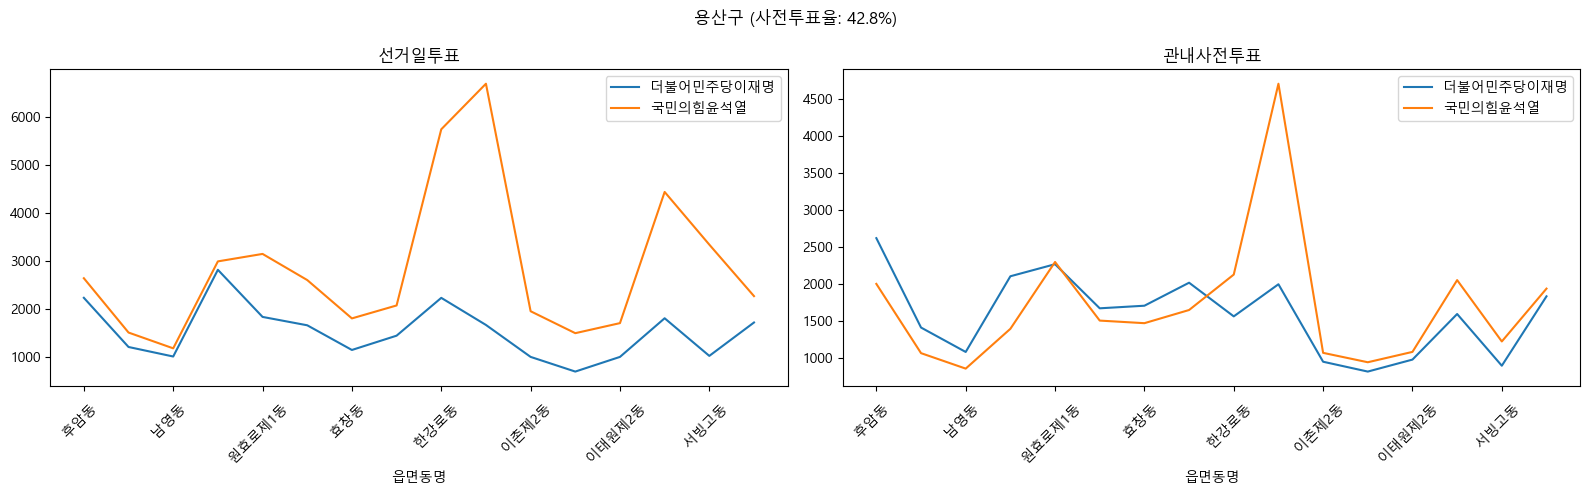

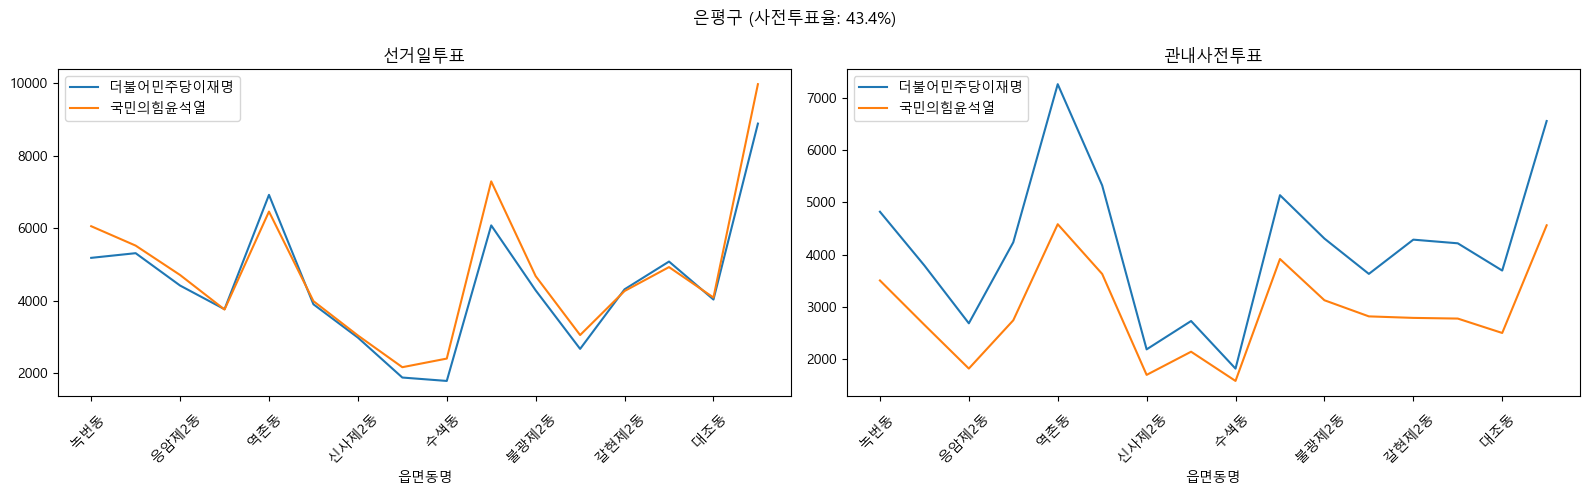

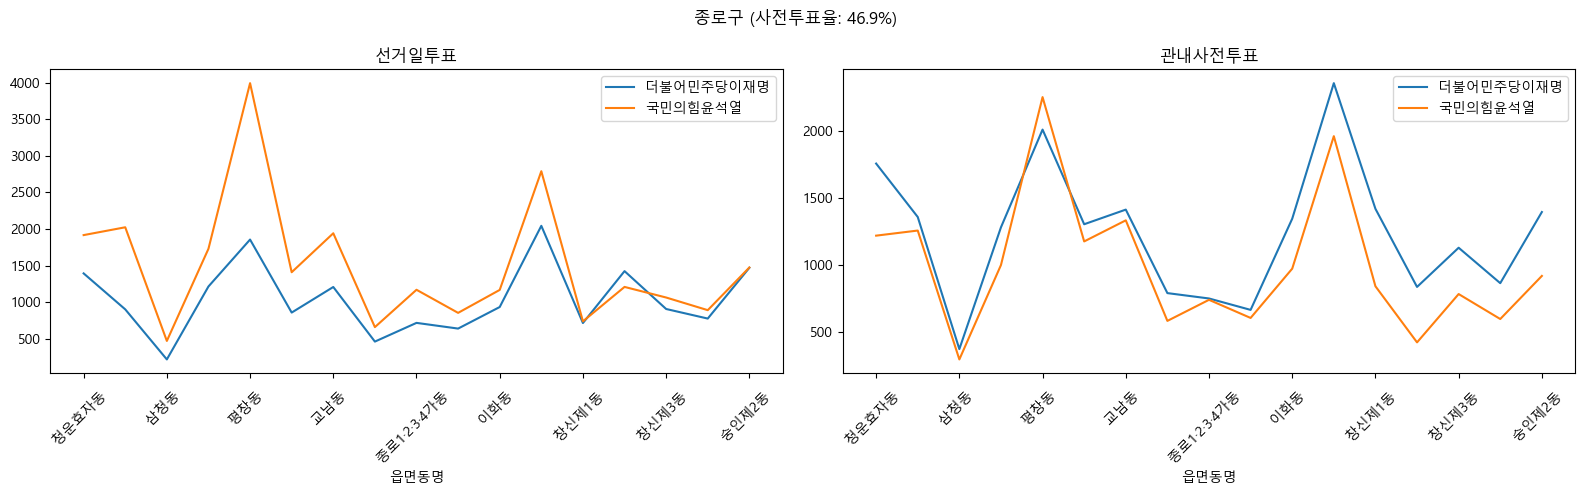

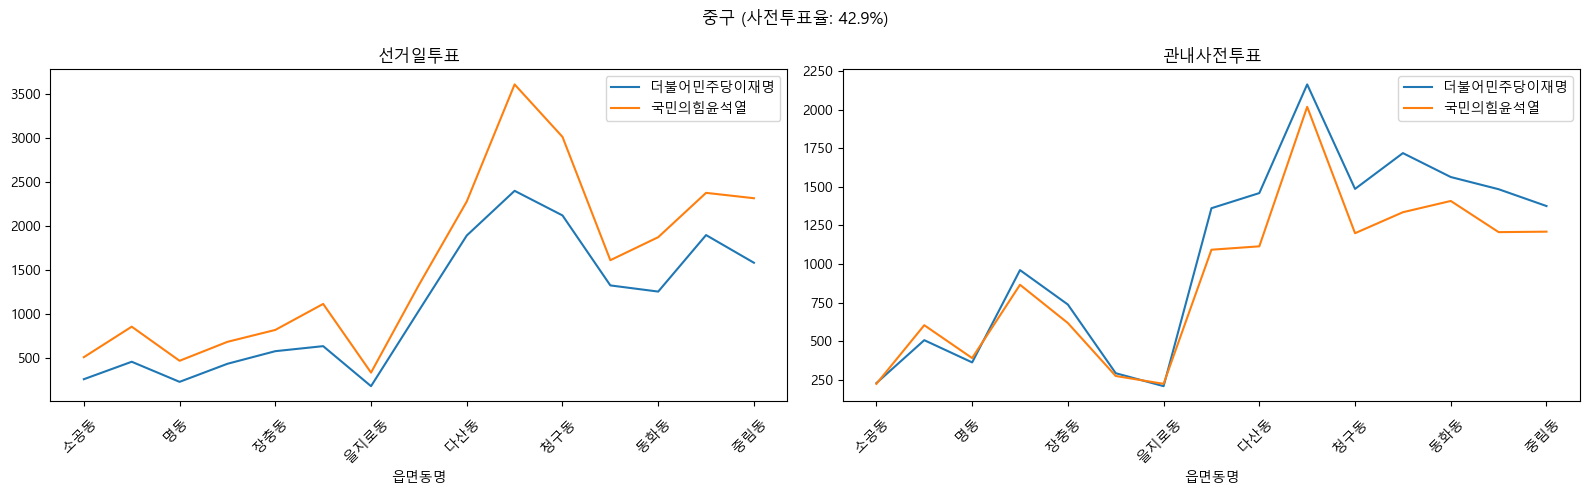

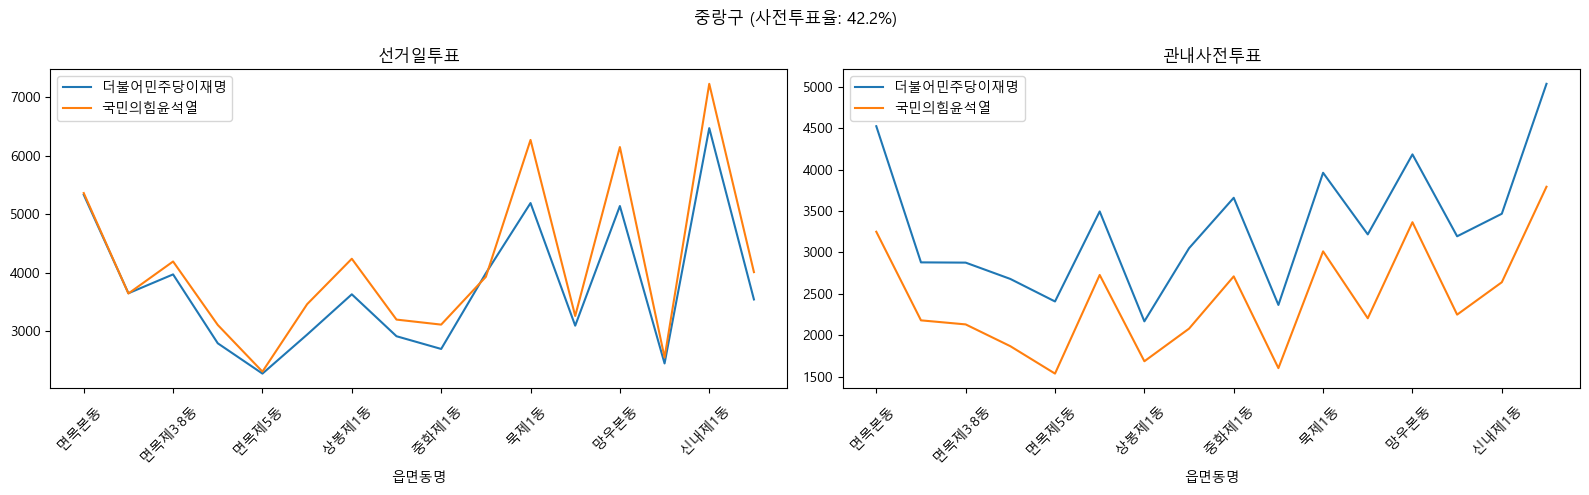

In [96]:
for data_path in glob('data/*'):
    ÏßÄÏó≠Íµ¨Î™Ö = os.path.split(data_path)[-1].split('.')[0].split('[')[-1].strip(']')
    df = pd.read_excel(f'{data_path}', header=5).rename(columns={
        "Unnamed: 0":"ÏùçÎ©¥ÎèôÎ™Ö",
        "Unnamed: 1":"Íµ¨Î∂Ñ",
        "Unnamed: 2":"ÏÑ†Í±∞Ïù∏Ïàò",
        "Unnamed: 3":"Ìà¨ÌëúÏàò",
        "Unnamed: 17":"Î¨¥Ìö®Ìà¨ÌëúÏàò",
        "Unnamed: 18":"Í∏∞Í∂åÏûêÏàò",
        })
    df['index'] = df['ÏùçÎ©¥ÎèôÎ™Ö'] + df['Íµ¨Î∂Ñ']
    cols = ['index'] + [col for col in df.columns if col != 'index']
    df = df[cols]
    df['Íµ¨Î∂Ñ'] = df['Íµ¨Î∂Ñ'].str.replace(' ','')
    df.columns = df.columns.str.replace('\n', '', regex=False)
    df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else int(x))

    early_voting = df[df['Íµ¨Î∂Ñ'] == 'Í¥ÄÎÇ¥ÏÇ¨Ï†ÑÌà¨Ìëú']
    onday_voting = df[df['Íµ¨Î∂Ñ'] == 'ÏÑ†Í±∞ÏùºÌà¨Ìëú']

    # ÏÇ¨Ï†ÑÌà¨ÌëúÏú® Í≥ÑÏÇ∞
    early_total = early_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum().sum()
    onday_total = onday_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum().sum()
    total_votes = early_total + onday_total

    early_rate = early_total / total_votes * 100

    # 1Ìñâ 2Ïó¥ ÌîåÎ°Ø ÏÉùÏÑ±
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Ï†ÑÏ≤¥ Ï†úÎ™© (ÏßÄÏó≠Íµ¨Î™Ö + ÏÇ¨Ï†ÑÌà¨ÌëúÏú®)
    fig.suptitle(f'{ÏßÄÏó≠Íµ¨Î™Ö} (ÏÇ¨Ï†ÑÌà¨ÌëúÏú®: {early_rate:.1f}%)', fontsize=12)

    # ÏÑ†Í±∞Ïùº Ìà¨Ìëú
    onday_voting.set_index('ÏùçÎ©¥ÎèôÎ™Ö')[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö','Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']] \
        .astype(int).plot(ax=axes[0], title='ÏÑ†Í±∞ÏùºÌà¨Ìëú', rot=45)

    # Í¥ÄÎÇ¥ ÏÇ¨Ï†ÑÌà¨Ìëú
    early_voting.set_index('ÏùçÎ©¥ÎèôÎ™Ö')[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö','Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']] \
        .astype(int).plot(ax=axes[1], title='Í¥ÄÎÇ¥ÏÇ¨Ï†ÑÌà¨Ìëú', rot=45)

    plt.tight_layout()  # ÌÉÄÏù¥ÌãÄ Í≥µÍ∞Ñ ÌôïÎ≥¥
    plt.show()



In [102]:
# ÎèôÎÑ§ Í∏∞Ï§Ä ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†
for data_path in glob('data/*'):
    ÏßÄÏó≠Íµ¨Î™Ö = os.path.split(data_path)[-1].split('.')[0].split('[')[-1].strip(']')
    df = pd.read_excel(f'{data_path}', header=5).rename(columns={
        "Unnamed: 0":"ÏùçÎ©¥ÎèôÎ™Ö",
        "Unnamed: 1":"Íµ¨Î∂Ñ",
        "Unnamed: 2":"ÏÑ†Í±∞Ïù∏Ïàò",
        "Unnamed: 3":"Ìà¨ÌëúÏàò",
        "Unnamed: 17":"Î¨¥Ìö®Ìà¨ÌëúÏàò",
        "Unnamed: 18":"Í∏∞Í∂åÏûêÏàò",
        })
    df['index'] = df['ÏùçÎ©¥ÎèôÎ™Ö'] + df['Íµ¨Î∂Ñ']
    cols = ['index'] + [col for col in df.columns if col != 'index']
    df = df[cols]
    df['Íµ¨Î∂Ñ'] = df['Íµ¨Î∂Ñ'].str.replace(' ','')
    df.columns = df.columns.str.replace('\n', '', regex=False)
    df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else int(x))

    early_voting = df[df['Íµ¨Î∂Ñ'] == 'Í¥ÄÎÇ¥ÏÇ¨Ï†ÑÌà¨Ìëú']
    onday_voting = df[df['Íµ¨Î∂Ñ'] == 'ÏÑ†Í±∞ÏùºÌà¨Ìëú']

    # ÌõÑÎ≥¥Î≥Ñ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    lee_wins = []
    yoon_wins = []

    # ÏùçÎ©¥ÎèôÎ≥ÑÎ°ú Î∞òÎ≥µ
    for _, row in early_voting.iterrows():
        dong = row['ÏùçÎ©¥ÎèôÎ™Ö']
        lee = int(row['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö'])
        yoon = int(row['Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥'])

        if lee > yoon:
            lee_wins.append(dong)
        elif yoon > lee:
            yoon_wins.append(dong)
        # ÎèôÎ•†Ïù¥Î©¥ Î¨¥Ïãú

    # Ï†ÑÏ≤¥ ÎπÑÍµê ÎåÄÏÉÅ Ïàò
    total_compared = len(lee_wins) + len(yoon_wins)

    # ÏäπÎ•† Í≥ÑÏÇ∞
    lee_rate = len(lee_wins) / total_compared * 100
    yoon_rate = len(yoon_wins) / total_compared * 100

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f'‚úÖ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: {len(lee_wins)}')
    print(f'‚úÖ Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: {len(yoon_wins)}')
    print(f'üìä Ïù¥Ïû¨Î™Ö ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: {lee_rate:.1f}%')
    print(f'üìä Ïú§ÏÑùÏó¥ ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: {yoon_rate:.1f}%')

    print('\nüü¶ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÎèôÎÑ§:')
    print(', '.join(lee_wins))

    print('\nüü• Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÎèôÎÑ§:')
    print(', '.join(yoon_wins))



‚úÖ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: 13
‚úÖ Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: 0
üìä Ïù¥Ïû¨Î™Ö ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: 100.0%
üìä Ïú§ÏÑùÏó¥ ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: 0.0%

üü¶ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÎèôÎÑ§:
ÏÇºÏñëÎèô  , ÎØ∏ÏïÑÎèô  , ÏÜ°Ï§ëÎèô  , ÏÜ°Ï≤úÎèô  , ÏÇºÍ∞ÅÏÇ∞Îèô  , Î≤à1Îèô  , Î≤à2Îèô  , Î≤à3Îèô  , ÏàòÏú†1Îèô  , ÏàòÏú†2Îèô  , ÏàòÏú†3Îèô  , Ïö∞Ïù¥Îèô  , Ïù∏ÏàòÎèô  

üü• Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÎèôÎÑ§:

‚úÖ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: 20
‚úÖ Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÏùçÎ©¥Îèô Ïàò: 0
üìä Ïù¥Ïû¨Î™Ö ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: 100.0%
üìä Ïú§ÏÑùÏó¥ ÏÇ¨Ï†ÑÌà¨Ìëú ÏäπÎ•†: 0.0%

üü¶ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÎèôÎÑ§:
ÏóºÏ∞ΩÎèô  , Îì±Ï¥åÏ†ú1Îèô  , Îì±Ï¥åÏ†ú2Îèô  , Îì±Ï¥åÏ†ú3Îèô  , ÌôîÍ≥°Î≥∏Îèô  , ÌôîÍ≥°Ï†ú1Îèô  , ÌôîÍ≥°Ï†ú2Îèô  , ÌôîÍ≥°Ï†ú3Îèô  , ÌôîÍ≥°Ï†ú4Îèô  , ÌôîÍ≥°Ï†ú6Îèô  , ÌôîÍ≥°Ï†ú8Îèô  , Ïö∞Ïû•ÏÇ∞Îèô  , Í∞ÄÏñëÏ†ú1Îèô  , Í∞ÄÏñëÏ†ú2Îèô  , Í∞ÄÏñëÏ†ú3Îèô  , Î∞úÏÇ∞Ï†ú1Îèô  , Í≥µÌï≠Îèô  , Î∞©ÌôîÏ†ú1Îèô  , Î∞©ÌôîÏ†ú2Îèô  , Î∞©ÌôîÏ†ú3Îèô  

üü• Ïú§ÏÑùÏó¥Ïù¥ Ïù¥Í∏¥ ÎèôÎÑ§:

‚úÖ Ïù¥Ïû¨Î™ÖÏù¥ Ïù¥Í∏¥ ÏùçÎ©¥Î

In [101]:
print('ÏÇ¨Ï†ÑÌà¨Ìëú')
print( early_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum())
print()
print('ÏÑ†Í±∞ÏùºÌà¨Ìëú')
print( onday_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum())

# Ïù¥Ïû¨Î™ÖÏùÑ Ï∞çÎäî ÏÇ¨ÎûåÎì§Ïù¥ Îçî ÏÇ¨Ï†ÑÌà¨ÌëúÎ•º ÎßéÏù¥ÌïúÎã§?

ÏÇ¨Ï†ÑÌà¨Ìëú
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö    53155
Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥      39023
dtype: int64

ÏÑ†Í±∞ÏùºÌà¨Ìëú
ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö    60060
Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥      66009
dtype: int64


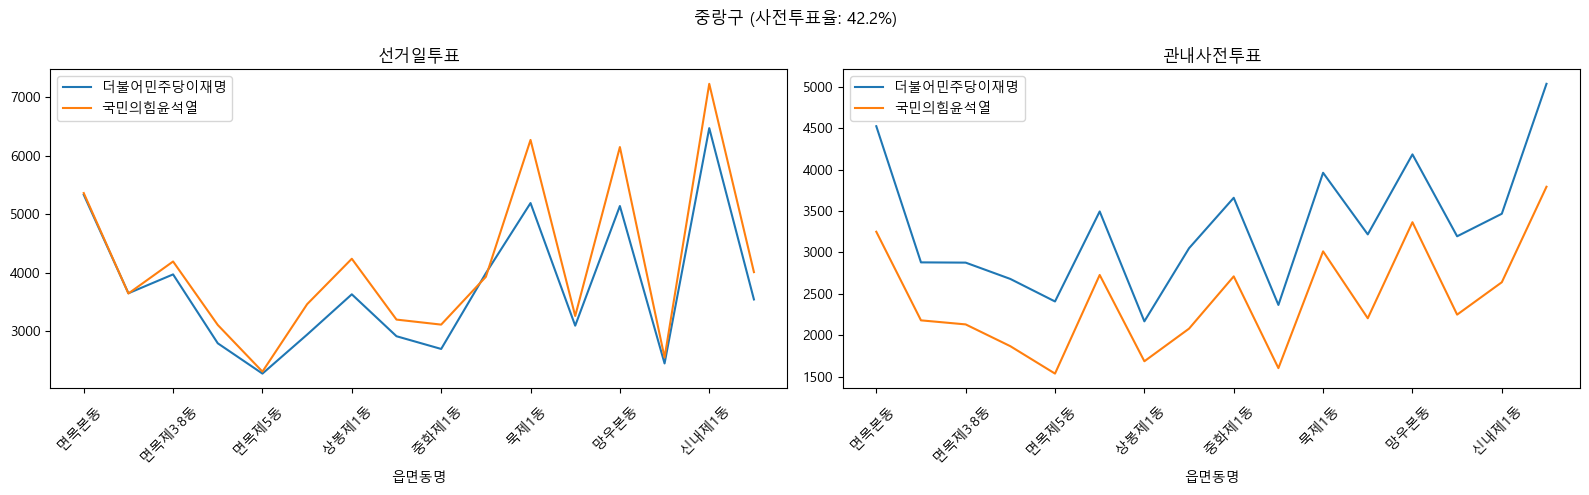

In [95]:
# ÏÇ¨Ï†ÑÌà¨ÌëúÏú® Í≥ÑÏÇ∞
early_total = early_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum().sum()
onday_total = onday_voting[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö', 'Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']].astype(int).sum().sum()
total_votes = early_total + onday_total

early_rate = early_total / total_votes * 100

# 1Ìñâ 2Ïó¥ ÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Ï†ÑÏ≤¥ Ï†úÎ™© (ÏßÄÏó≠Íµ¨Î™Ö + ÏÇ¨Ï†ÑÌà¨ÌëúÏú®)
fig.suptitle(f'{ÏßÄÏó≠Íµ¨Î™Ö} (ÏÇ¨Ï†ÑÌà¨ÌëúÏú®: {early_rate:.1f}%)', fontsize=12)

# ÏÑ†Í±∞Ïùº Ìà¨Ìëú
onday_voting.set_index('ÏùçÎ©¥ÎèôÎ™Ö')[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö','Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']] \
    .astype(int).plot(ax=axes[0], title='ÏÑ†Í±∞ÏùºÌà¨Ìëú', rot=45)

# Í¥ÄÎÇ¥ ÏÇ¨Ï†ÑÌà¨Ìëú
early_voting.set_index('ÏùçÎ©¥ÎèôÎ™Ö')[['ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπÏù¥Ïû¨Î™Ö','Íµ≠ÎØºÏùòÌûòÏú§ÏÑùÏó¥']] \
    .astype(int).plot(ax=axes[1], title='Í¥ÄÎÇ¥ÏÇ¨Ï†ÑÌà¨Ìëú', rot=45)

plt.tight_layout()  # ÌÉÄÏù¥ÌãÄ Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()
